In [1]:
import geopandas as gpd
import geoplot
import matplotlib.pyplot as plt
import pystac

from stac_df import pystac_catalog_to_dataframe
from coregister import coregister_raster

In [2]:
# Load S1 chips catalog
sar_catalog = pystac.Catalog.from_file("./data/usfimr-sar-catalog/catalog.json")
sar_df = pystac_catalog_to_dataframe(sar_catalog, crs="EPSG:32616")
# TODO: Cleanup -- will eventually already be in 4326
sar_df = sar_df.to_crs("EPSG:4326")

In [3]:
sar_df = sar_df.drop_duplicates(subset=['id'])

In [4]:
sar_df.head()

,type,stac_version,id,properties,geometry,bbox,links,assets,collection
16SBE_2_0,Feature,0.9.0,16SBE_2_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.88119 35.92963, -89.65929 35.934...","[3979980.0, 240060.0, 4000020.0, 260100.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1
16SBE_3_0,Feature,0.9.0,16SBE_3_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.65929 35.93475, -89.43734 35.939...","[3979980.0, 260100.0, 4000020.0, 280140.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1
16SBE_4_0,Feature,0.9.0,16SBE_4_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.43734 35.93947, -89.21533 35.943...","[3979980.0, 280140.0, 4000020.0, 300180.0]","[{'rel': 'collection', 'href': '../collection....",{},1
16SBF_2_1,Feature,0.9.0,16SBF_2_1,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.90781 36.64976, -89.68387 36.655...","[4059960.0, 240060.0, 4080000.0, 260100.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1
16SBF_2_2,Feature,0.9.0,16SBF_2_2,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.90105 36.46933, -89.67763 36.474...","[4039920.0, 240060.0, 4059960.0, 260100.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1


In [5]:
sar_df[['id', 'geometry']].to_file("./data/sar_df.geojson", driver="GeoJSON")

<AxesSubplot:>

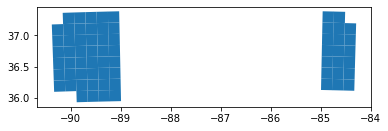

In [6]:
sar_df.plot()

In [7]:
hand_catalog = pystac.Collection.from_file("./data/hand-catalog/collection.json")
hand_df = pystac_catalog_to_dataframe(hand_catalog)
hand_df = hand_df.to_crs("EPSG:4326")

In [8]:
hand_df.head()

,type,stac_version,id,properties,geometry,bbox,links,assets,collection
010100,Feature,0.9.0,010100,{'datetime': '2020-06-01T00:00:00Z'},"POLYGON ((-68.27892 47.94667, -67.97930 47.781...","[-70.4171738459305, 45.73847961442135, -66.604...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
010200,Feature,0.9.0,010200,{'datetime': '2020-06-01T00:00:00Z'},"POLYGON ((-69.58057 46.44381, -69.43966 46.374...","[-70.41066509906557, 44.40789491961169, -67.68...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
010300,Feature,0.9.0,010300,{'datetime': '2020-06-01T00:00:00Z'},"POLYGON ((-69.65113 45.90654, -69.65047 45.906...","[-70.81727369947612, 43.99992665045329, -69.09...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
010400,Feature,0.9.0,010400,{'datetime': '2020-06-01T00:00:00Z'},"POLYGON ((-70.81727 45.29861, -70.79182 45.286...","[-71.3529948882279, 43.90034664435785, -69.860...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
010500,Feature,0.9.0,010500,{'datetime': '2020-06-01T00:00:00Z'},"POLYGON ((-67.78687 45.95588, -67.78626 45.955...","[-69.87654284572801, 43.64470886767134, -66.01...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021


<AxesSubplot:>

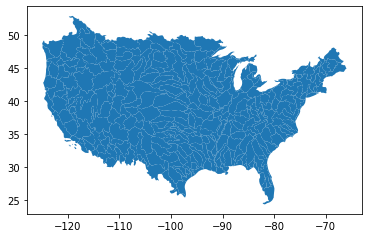

In [9]:
hand_df.plot()

In [10]:
hand_sar_df = gpd.sjoin(hand_df, sar_df, op="intersects", how="inner")

<AxesSubplot:>

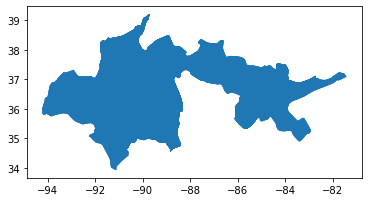

In [11]:
hand_sar_df.plot()

In [12]:
sar_hand_df = gpd.sjoin(sar_df, hand_df, op="intersects", how="inner", lsuffix="sar", rsuffix="hand")

In [13]:
sar_hand_df.head()

,type_sar,stac_version_sar,id_sar,properties_sar,geometry,bbox_sar,links_sar,assets_sar,collection_sar,index_hand,type_hand,stac_version_hand,id_hand,properties_hand,bbox_hand,links_hand,assets_hand,collection_hand
16SBE_2_0,Feature,0.9.0,16SBE_2_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.88119 35.92963, -89.65929 35.934...","[3979980.0, 240060.0, 4000020.0, 260100.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBE_3_0,Feature,0.9.0,16SBE_3_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.65929 35.93475, -89.43734 35.939...","[3979980.0, 260100.0, 4000020.0, 280140.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBE_4_0,Feature,0.9.0,16SBE_4_0,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.43734 35.93947, -89.21533 35.943...","[3979980.0, 280140.0, 4000020.0, 300180.0]","[{'rel': 'collection', 'href': '../collection....",{},1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBF_3_3,Feature,0.9.0,16SBF_3_3,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.67144 36.29409, -89.44848 36.298...","[4019880.0, 260100.0, 4039920.0, 280140.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021
16SBF_3_4,Feature,0.9.0,16SBF_3_4,{'datetime': '2017-05-04T12:03:43Z'},"POLYGON ((-89.66531 36.11361, -89.44286 36.118...","[3999840.0, 260100.0, 4019880.0, 280140.0]","[{'rel': 'collection', 'href': '../../1/collec...",{},1,080102,Feature,0.9.0,080102,{'datetime': '2020-06-01T00:00:00Z'},"[-90.26463817241495, 34.54691906095957, -88.30...","[{'rel': 'collection', 'href': '../collection....",{'hand': {'href': 'https://hand-data.s3.amazon...,hand_021


In [14]:
sar_hand_df = sar_hand_df[['id_sar', 'geometry', 'bbox_sar', 'index_hand', 'assets_hand', 'assets_sar']]

<AxesSubplot:>

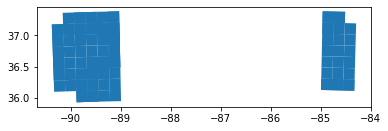

In [15]:
sar_hand_df.plot()

In [16]:
from urllib.parse import urlparse

def https_to_s3_url(https_url_str):
    https_url = urlparse(https_url_str)
    bucket, *_ = https_url.netloc.split(".")
    return "s3://{}{}".format(bucket, https_url.path)

def assets_to_s3_url(row):
    row['assets_hand'] = https_to_s3_url(row.get('assets_hand', {}).get('hand', {}).get('href', ''))
    row['assets_sar'] = https_to_s3_url(row.get('assets_sar', {}).get('sar', {}).get('href', ''))
    return row

In [17]:
def coregister_row(row):
    # local_output_path = ???
    output_uri = "s3://bucket/path/{}/{}-hand.tif".format(row['id_sar'], row['id_sar'])
    # coregister_raster(row['assets_had'], row['assets_sar'], local_output_path)
    # TODO: Upload local_output_path to output_uri
    row['assets_hand_sar'] = output_uri
    return row
    

In [18]:
sar_hand_df.apply(assets_to_s3_url, axis=1).apply(coregister_row, axis=1)

,id_sar,geometry,bbox_sar,index_hand,assets_hand,assets_sar,assets_hand_sar
16SBE_2_0,16SBE_2_0,"POLYGON ((-89.88119 35.92963, -89.65929 35.934...","[3979980.0, 240060.0, 4000020.0, 260100.0]",080102,s3://hand-data/080102/080102-hand.tif,s3://,s3://bucket/path/16SBE_2_0/16SBE_2_0-hand.tif
16SBE_3_0,16SBE_3_0,"POLYGON ((-89.65929 35.93475, -89.43734 35.939...","[3979980.0, 260100.0, 4000020.0, 280140.0]",080102,s3://hand-data/080102/080102-hand.tif,s3://,s3://bucket/path/16SBE_3_0/16SBE_3_0-hand.tif
16SBE_4_0,16SBE_4_0,"POLYGON ((-89.43734 35.93947, -89.21533 35.943...","[3979980.0, 280140.0, 4000020.0, 300180.0]",080102,s3://hand-data/080102/080102-hand.tif,s3://,s3://bucket/path/16SBE_4_0/16SBE_4_0-hand.tif
16SBF_3_3,16SBF_3_3,"POLYGON ((-89.67144 36.29409, -89.44848 36.298...","[4019880.0, 260100.0, 4039920.0, 280140.0]",080102,s3://hand-data/080102/080102-hand.tif,s3://,s3://bucket/path/16SBF_3_3/16SBF_3_3-hand.tif
16SBF_3_4,16SBF_3_4,"POLYGON ((-89.66531 36.11361, -89.44286 36.118...","[3999840.0, 260100.0, 4019880.0, 280140.0]",080102,s3://hand-data/080102/080102-hand.tif,s3://,s3://bucket/path/16SBF_3_4/16SBF_3_4-hand.tif
...,...,...,...,...,...,...,...
16SBF_0_2,16SBF_0_2,"POLYGON ((-90.34772 36.45763, -90.12442 36.463...","[4039920.0, 199980.0, 4059960.0, 220020.0]",080203,s3://hand-data/080203/080203-hand.tif,s3://,s3://bucket/path/16SBF_0_2/16SBF_0_2-hand.tif
16SBF_0_3,16SBF_0_3,"POLYGON ((-90.34000 36.27727, -90.11721 36.283...","[4019880.0, 199980.0, 4039920.0, 220020.0]",080203,s3://hand-data/080203/080203-hand.tif,s3://,s3://bucket/path/16SBF_0_3/16SBF_0_3-hand.tif
15SXB_4_3,15SXB_4_3,"POLYGON ((-84.96977 37.20766, -84.74409 37.203...","[4119840.0, 680160.0, 4139880.0, 700200.0]",051100,s3://hand-data/051100/051100-hand.tif,s3://,s3://bucket/path/15SXB_4_3/15SXB_4_3-hand.tif
15SXB_4_4,15SXB_4_4,"POLYGON ((-84.97458 37.02713, -84.74944 37.023...","[4099800.0, 680160.0, 4119840.0, 700200.0]",051100,s3://hand-data/051100/051100-hand.tif,s3://,s3://bucket/path/15SXB_4_4/15SXB_4_4-hand.tif
